In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from lib.shared.file_utils import get_filename

## SET PARAMETERS

### Fixed parameters for preprocessing

- `CONFIG_FILE_PATH`: Path to a Brieflow config file used during processing*.
- `ROOT_FP`: Path to root of Brieflow output directory*.

*Note: Paths can be absolute or relative to where workflows are run from.

In [8]:
CONFIG_FILE_PATH = "config/config.yml"
ROOT_FP = "analysis_root/"

### Generate maps of metadata, and check if initial sites is a logical choice

In [2]:
# TODO: Figure out good way to use testing data for example analysis...
# for now just use copied files from denali screen

TEST_WELL = "A7"
TEST_CYCLE = 1

In [20]:
ph_test_metadata_fp = f"{ROOT_FP}/preprocess/metadata/phenotype/" + get_filename(
    {"well": TEST_WELL}, "combined_metadata", "tsv"
)
ph_test_metadata = pd.read_csv(ph_test_metadata_fp, sep="\t")

sbs_test_metadata_fp = f"{ROOT_FP}/preprocess/metadata/sbs/" + get_filename(
    {"well": TEST_WELL, "cycle": TEST_CYCLE}, "combined_metadata", "tsv"
)
sbs_test_metadata = pd.read_csv(sbs_test_metadata_fp, sep="\t")
sbs_test_metadata

# TODO: Address this properly in metadata extraction
# convert the lists in the x,y,z data to numbers
ph_test_metadata[['x_data', 'y_data', 'z_data']] = ph_test_metadata[['x_data', 'y_data', 'z_data']].applymap(lambda x: float(x.strip("[]")))
sbs_test_metadata[['x_data', 'y_data', 'z_data']] = sbs_test_metadata[['x_data', 'y_data', 'z_data']].applymap(lambda x: float(x.strip("[]")))

/tmp/ipykernel_4063868/2487395260.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ph_test_metadata[['x_data', 'y_data', 'z_data']] = ph_test_metadata[['x_data', 'y_data', 'z_data']].applymap(lambda x: float(x.strip("[]")))
/tmp/ipykernel_4063868/2487395260.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sbs_test_metadata[['x_data', 'y_data', 'z_data']] = sbs_test_metadata[['x_data', 'y_data', 'z_data']].applymap(lambda x: float(x.strip("[]")))


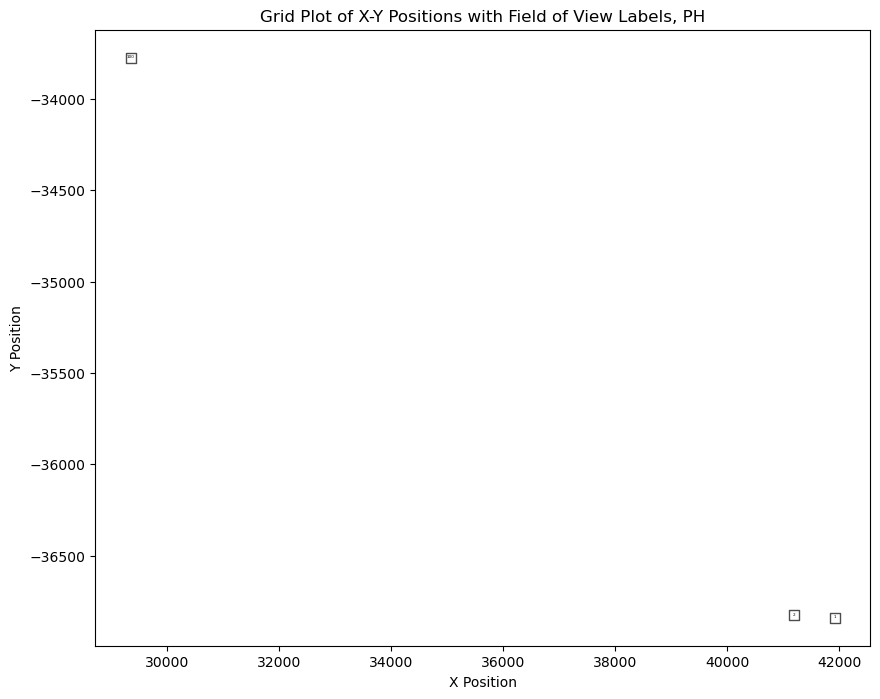

In [22]:
plt.figure(figsize=(10, 8))

# Scatter plot with squares for each point
plt.scatter(
    ph_test_metadata["x_data"],
    ph_test_metadata["y_data"],
    s=50,
    c="white",
    marker="s",
    edgecolors="black",
    linewidths=1,
    alpha=0.7,
)

# Label each point with the 'field_of_view' variable
for i, txt in enumerate(ph_test_metadata["tile"]):
    plt.annotate(
        txt,
        (ph_test_metadata["x_data"].iloc[i], ph_test_metadata["y_data"].iloc[i]),
        textcoords="offset points",
        xytext=(0, 0),
        ha="center",
        fontsize=3,
    )
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Grid Plot of X-Y Positions with Field of View Labels, PH")
plt.show()

<Figure size 1000x800 with 0 Axes>

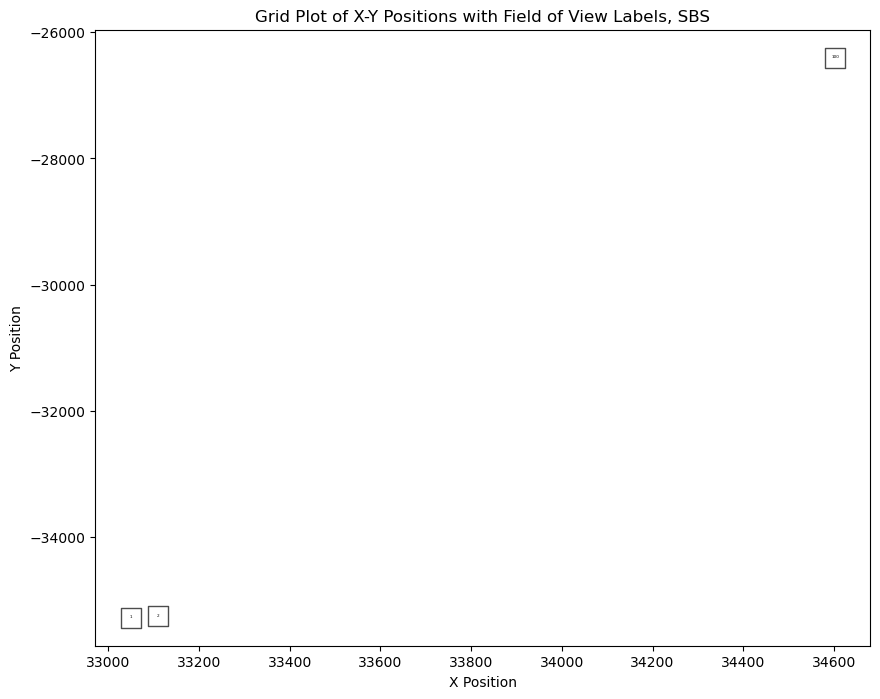

In [25]:
plt.figure(figsize=(10, 8))

# Scatter plot with squares for each point
plt.figure(figsize=(10, 8))

# Scatter plot with squares for each point
plt.scatter(sbs_test_metadata['x_data'], sbs_test_metadata['y_data'], 
            s=200, c='white', marker='s', edgecolors='black', 
            linewidths=1, alpha=0.7)

# Label each point with the 'field_of_view' variable
for i, txt in enumerate(sbs_test_metadata['tile']):
    plt.annotate(txt, (sbs_test_metadata['x_data'].iloc[i], sbs_test_metadata['y_data'].iloc[i]), 
                 textcoords="offset points", xytext=(0,0), ha='center', fontsize=3)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Grid Plot of X-Y Positions with Field of View Labels, SBS')
plt.show()

In [23]:
ph_test_metadata

,x_data,y_data,z_data,pfs_offset,tile,filename,channels,pixel_size_x,pixel_size_y
0,41922.3,-36839.3,3162.68,NaN,1,data/phenotype/real_images/P001_Pheno_20x_Well...,4,0.325,0.325
1,41197.1,-36826.3,4034.02,NaN,2,data/phenotype/empty_images/P003_Pheno_20x_Wel...,4,1.625,1.625
2,29349.5,-33774.3,3159.34,NaN,100,data/phenotype/real_images/P001_Pheno_20x_Well...,4,0.325,0.325
